In [1]:
import sys  ###mclglobal1（下のセルも）
sys.path.append('../scripts/')
from mcl import *

In [2]:
class GlobalMcl(Mcl):  
    def __init__(self, envmap, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},\
                 distance_dev_rate=0.14, direction_dev=0.05): #姿勢の引数を消す
        super().__init__(envmap, np.array([0, 0, 0]).T, num, motion_noise_stds, distance_dev_rate, direction_dev) #初期姿勢は適当に
        for p in self.particles: #ランダムに姿勢を初期化し直す
            p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T

In [4]:
def trial(animation): ###mclglobal1test
    time_interval = 0.1
    world = World(30, time_interval, debug=not animation)  #アニメーションのON、OFFをdebugで制御

    ## 地図を生成して3つランドマークを追加 ##
    m = Map()
    for ln in [(-4,2), (2,-3), (3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)

    ## ロボットを作る ##
    init_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalMcl(m, 100)
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)

    world.draw()
    
    return (r.pose, pf.pose) #真の姿勢と推定姿勢を返す

In [5]:
if __name__ == '__main__': ###mclglobal1exec
    ok = 0
    for i in range(1000):
        actual, estm = trial(False)
        diff = math.sqrt((actual[0]-estm[0])**2 + (actual[1]-estm[1])**2)
        print(i, "真値:", actual, "推定値", estm, "誤差:", diff)
        if diff <= 1.0:
            ok += 1

    ok

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


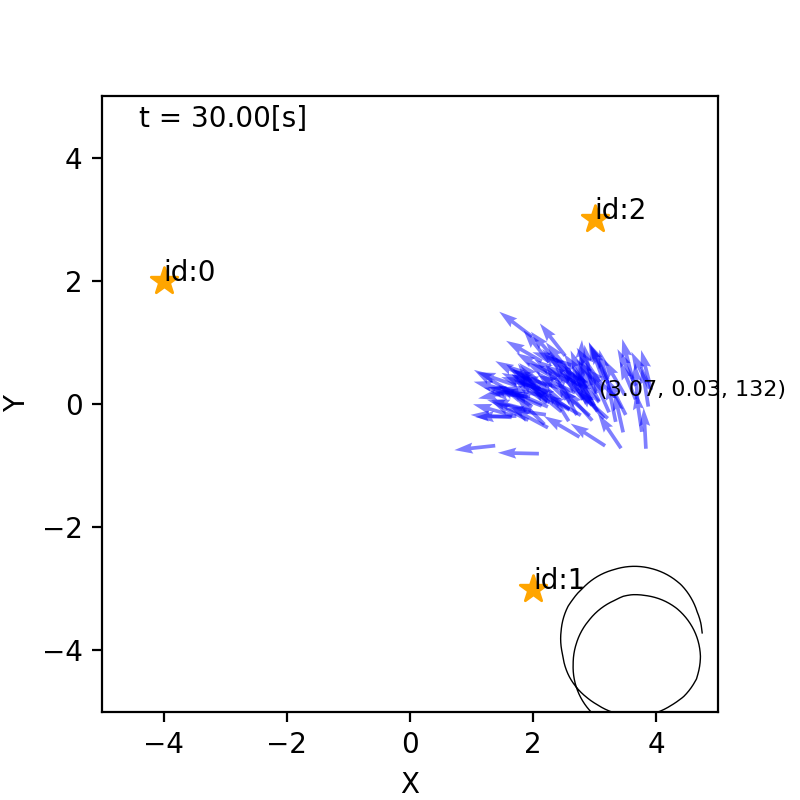

(array([ 4.37933038, -4.79944008,  6.91921439]),
 array([1.49499202, 0.78172382, 3.0998349 ]))

In [8]:
trial(True)